In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, PredictionErrorDisplay

In [3]:
#get location of current working directory
#cwd = os.getcwd()  
#files = os.listdir(cwd) 
#print("Files in %r: %s" % (cwd, files))

In [4]:
#get sample data
sample_file = "sample.csv"
sample_data = pd.read_csv(sample_file, sep=",")

In [5]:
#get test data
test_file = "test.csv"
test_data = pd.read_csv(test_file, sep=",")

In [6]:
#get training data
train_file = "train.csv"
train_data = pd.read_csv(train_file,sep=",")

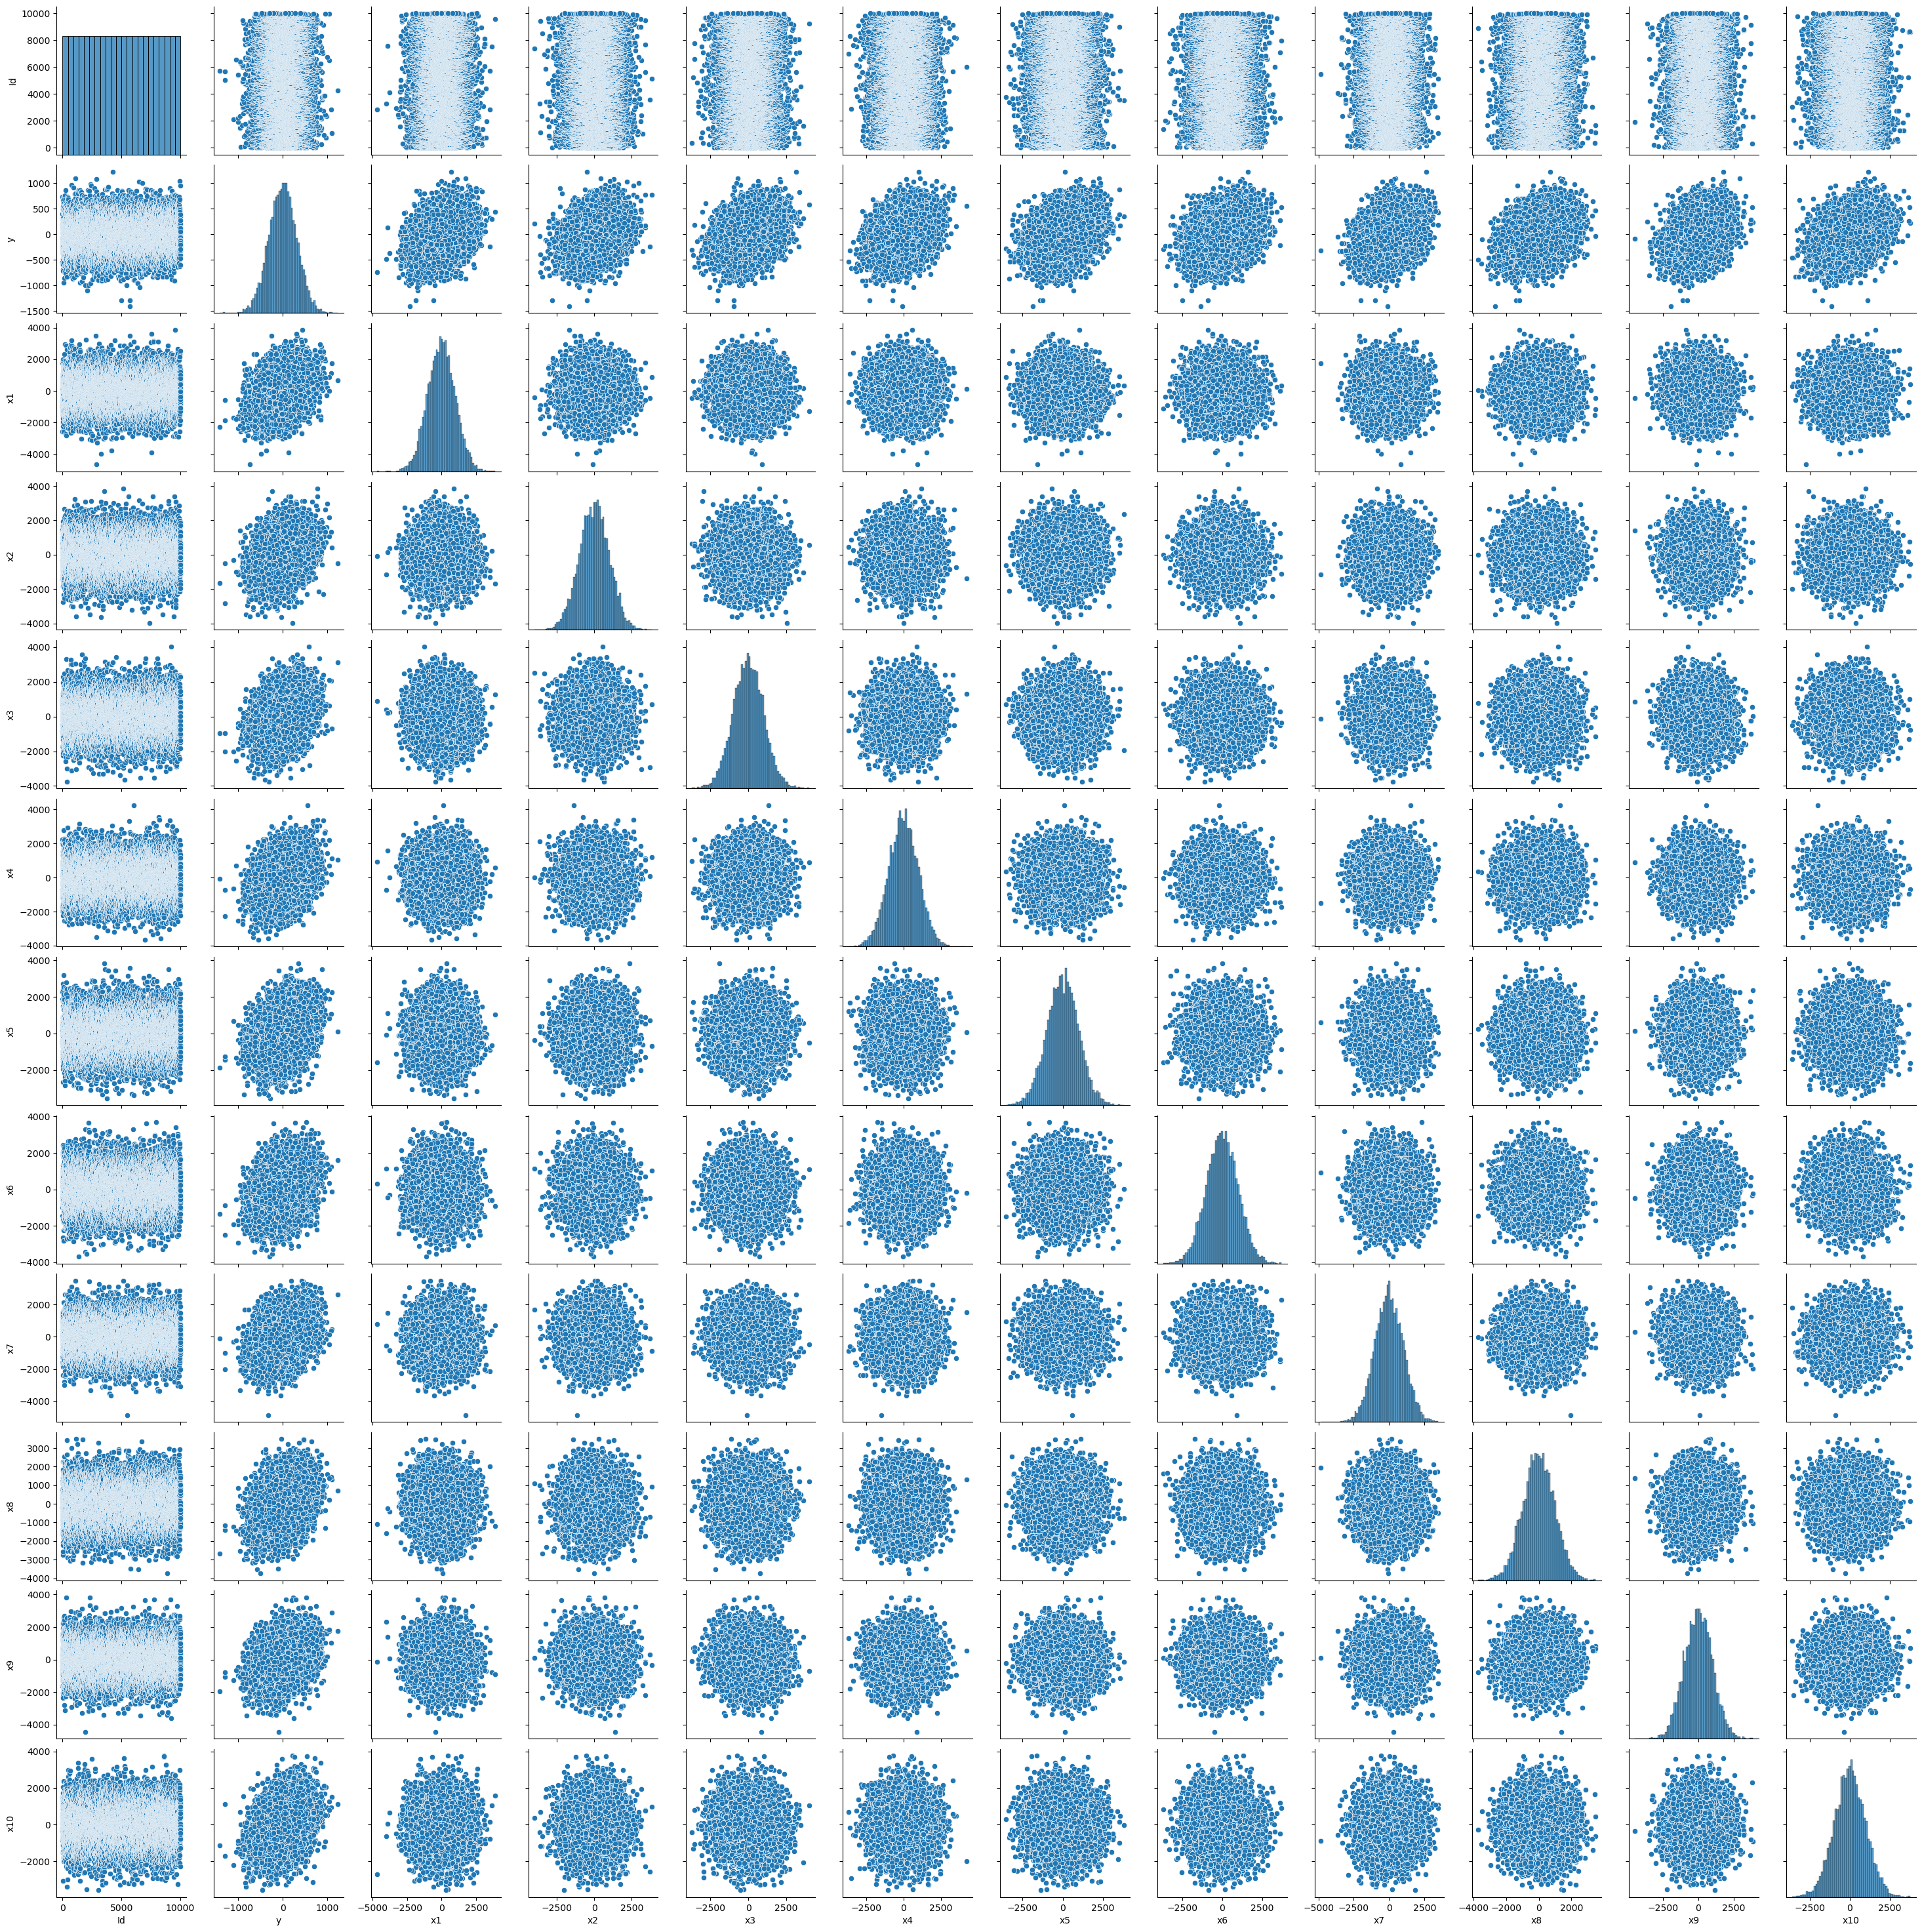

In [7]:
sns.pairplot(train_data)

In [ ]:
# a more informative plot
sns.set(style="ticks", color_codes=True)
sns.pairplot(train_data, hue='x1')

In [ ]:
#initialize training data
x_train = train_data.drop(labels=['Id', 'y'], axis= 1)

In [ ]:
#initialize training predictions
y_train = train_data['y']

In [ ]:
print(x_train)

In [ ]:
print(y_train)

In [ ]:
#litting the Dataset
#x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size= 1, random_state= 101)
#print(y_test)

In [ ]:
#Initialize test data and predictions
x_test = test_data.drop(labels=['Id'], axis= 1)


In [ ]:
# Instantiating LinearRegression() Model
lr = linear_model.LinearRegression()

In [ ]:
# Training/Fitting the Model
lr.fit(x_train, y_train)
print(x_train)

In [ ]:
# Making Predictions
lr.predict(x_test)
pred = lr.predict(x_test)
print(pred)

#convert predictions to dataframe
pred_df = pd.DataFrame(pred, columns=["y"]) 

#write predictions to file
pred_file = "pred.csv"
pred_df.to_csv(pred_file, index=True, sep=",")


In [ ]:
# The coefficients
print("Coefficients: \n", lr.coef_)

In [ ]:
#initialize results
y_test = sample_data['y']


In [ ]:
# The coefficients
print("Coefficients: \n", lr.coef_)
# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, pred))

In [ ]:
print(x_test)

In [ ]:
# Plot outputs
plt.scatter(x_test['x2'], y_test, color="black")
#plt.plot(X_test['sepal_width'], pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=pred)
display.plot()